# Credit Card Fraud

We will be detecting credit card fraud based on the different features of our dataset with 3 different models. Here is the Logistic Regression one.

We're looking to minimize the False Negative Rate or FNR.

Since the dataset is unbalanced, we can try two techniques that may help us have better predictions:

    - Adding some noise (gaussian) to the fraud data to create more and reduce the imbalance
    - Randomly sample the fraud data and train k models and average them out (or choose the best)
    
 

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [2]:
import os 

data_path = os.path.join('./dataset', 'creditcard.csv')
df = pd.read_csv(data_path, low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,131418.0,-1.418343,2.074760,-1.683303,-1.708984,1.340667,-0.802904,1.571283,-0.183383,0.610996,...,-0.016737,0.831867,-0.287168,0.217734,-0.062399,-0.017927,0.005060,-0.455670,3.70,0
1,30575.0,-2.007359,-1.812544,2.467946,0.717333,0.860664,-0.474420,-1.195674,0.418655,-1.559050,...,0.122850,0.295340,0.275766,0.213621,0.368420,-0.093973,0.056136,0.122159,97.00,0
2,48759.0,-1.455090,1.745371,0.393814,0.370542,0.419204,0.547102,-0.058742,-0.476353,-0.677755,...,0.920543,-0.148314,-0.188817,-1.033784,-0.091466,-0.409897,-0.612491,0.083665,5.00,0
3,66544.0,1.124034,-0.343542,1.361168,0.387759,-1.390420,-0.663302,-0.530391,-0.051080,0.999240,...,-0.170236,-0.236974,0.109470,1.023537,0.092587,0.903247,-0.030670,0.026613,34.66,0
4,121099.0,0.072966,1.004738,-0.452590,-0.530909,0.904533,-0.717924,1.226208,-0.198730,-0.261541,...,-0.300872,-0.735995,0.186777,0.588969,-0.354524,0.107859,0.214559,0.090296,49.99,0


In [3]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


In [4]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), '--', len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), '--',len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), '--', len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: (284807, 30) (284807,)
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 -- 0.001727485630620034
Number of frauds on y_test: 166 -- 0.0016652789342214821
Number of frauds on y_train: 326 -- 0.0017609818283961022


In [5]:
import statsmodels.api as sm

logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary())

# y_predicted = np.array(logistic.predict(X_test))
# y_right = np.array(y_test)

Optimization terminated successfully.
         Current function value: 0.009389
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               185124
Model:                          Logit   Df Residuals:                   185094
Method:                           MLE   Df Model:                           29
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                  0.2737
Time:                        21:45:23   Log-Likelihood:                -1738.2
converged:                       True   LL-Null:                       -2393.2
Covariance Type:            nonrobust   LLR p-value:                1.670e-257
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -8.811e-05   2.02e-06    -43.662      0.000   -9.21e-05   -8.42e-05
V1             0.5741      0

We can drop `V12` `V24` for simplicity

In [6]:
X_train = X_train.drop(['V12', 'V24'], axis=1)
X_test = X_test.drop(['V12', 'V24'], axis=1)

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V25,V26,V27,V28,Amount
880,158712.0,-0.809194,0.115803,-2.129629,-1.652926,0.202177,-0.986389,2.697194,-0.251622,-0.696479,...,0.405771,0.528314,0.623771,1.164183,0.469044,0.168189,0.903844,-0.181694,0.133513,359.83
21808,45001.0,-0.497740,1.682160,-0.883561,0.500387,1.003282,1.563936,-2.134137,-5.079111,-1.373160,...,0.836383,1.427697,-2.685652,0.313659,-0.406392,0.995879,0.681009,0.019808,0.251145,0.76
29650,72858.0,0.307455,-1.089231,-0.080013,2.884927,-0.364474,0.385788,0.634557,-0.089326,-0.286705,...,-0.417156,0.793361,0.003825,-0.954862,-0.494171,0.417813,-0.088909,-0.091142,0.095542,478.35
87735,93930.0,-0.448284,0.684104,0.128183,-0.614104,0.843270,-1.193620,1.547435,-0.718151,-1.354251,...,0.179386,-0.151744,-0.181042,0.231762,-0.538865,1.189820,1.282062,-0.101881,0.022023,64.99
74927,61698.0,0.260654,-2.557308,0.597547,-0.152963,-1.712075,1.090696,-0.755417,0.374810,-0.118935,...,0.325470,0.965348,0.402483,0.230155,-0.373145,0.008700,-0.253050,-0.012552,0.092829,501.43


In [7]:
from sklearn.linear_model import LogisticRegression 
 
log_clf = LogisticRegression(max_iter=500)
log_clf.fit(X_train, y_train)
 
y_predict = log_clf.predict(X_test)

Confusion matrix:
[[99497    20]
 [   70    96]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99517
           1       0.83      0.58      0.68       166

    accuracy                           1.00     99683
   macro avg       0.91      0.79      0.84     99683
weighted avg       1.00      1.00      1.00     99683



Text(0.5, 1.0, '2-class Precision-Recall curve: AUC=0.48')

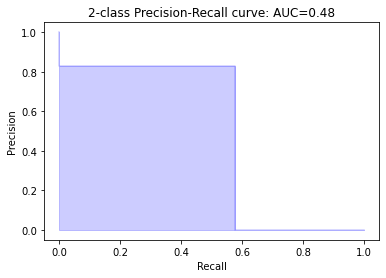

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

confusion = confusion_matrix(y_test, y_predict)
print("Confusion matrix:\n%s" % confusion)
print('\n')
print(classification_report(y_test, y_predict))

